
# Machine Learning  Engineer Nanodegree Capstone
Image classification of common grocery items and produce <br>

OS: Windows `10` <br>
Language: Python `3.7.3` <br>
Libraries: Pytorch `0.4.1`, Matplotlib `3.1.1` Numpy `1.16.4` <br>
Framework: Jupyter Notebook <br>

<br>

## Problem Statement 
In this project, I use python to merge data from two existing datasets, one containing 81 classes of produce and one containing 25 of grocery items.  Then, I use PyTorch to transform, preprocess, train and test data.  I compare two variation of the ResNet model: ResNet50 and ResNet18.  Between ResNet50 and ResNet18, the model with the highest accuracy was ResNet18.


## Datasets 

[Freiberg Grocery Dataset](http://aisdatasets.informatik.uni-freiburg.de/freiburg_groceries_dataset/) <br>
[Fruits 360 Dataset](https://data.mendeley.com/datasets/rp73yg93n8/1) <br>

## Overview 
### Custom dataset: 
- Downloaded datasets and unzipped files
- Separated Freiberg Grocery Set images into train and test sets  
- Combined both datasets into train and test folders 
- Renamed image names and folder names for both datasets
- Created custom Dataset to override __getitem__ and __len__
- Transformed and loaded images so they are prepared

### Algorithm: 
- Used pre-trained network, ResNet50, for transfer learning
- Froze final layer and created new layer
- Ran through training 
- Fine-tuned final layer
- Ran through training to measure improvement



## Resources 


### Creating a custom dataset: 

- [Towards Data Science: Building efficient custom datasets in pytorch](https://towardsdatascience.com/building-efficient-custom-datasets-in-pytorch-2563b946fd9f)

- [StackOverflow: custom based datasets](https://stackoverflow.com/questions/51577282/how-do-i-load-custom-image-based-datasets-into-pytorch-for-use-with-a-cnn)
- [Pytorch: Pytorch with examples](https://pytorch.org/tutorials/beginner/pytorch_with_examples.html)

- [Pytorch: Pytorch tutorial](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)

- [Pytorch: Pytorch data loading tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html)

- [Medium: classification using pytorch tutorial](https://medium.com/@uijaz59/dog-breed-classification-using-pytorch-207cf27c2031)

- [Medium: writing a dataloader for a custom dataset (neural network)](https://medium.com/analytics-vidhya/writing-a-custom-dataloader-for-a-simple-neural-network-in-pytorch-a310bea680af)

- [Naadi speaks: custom dataset tips and tricks](https://naadispeaks.wordpress.com/2019/10/08/pytorch-custom-dataset-tips-and-tricks/)

- [Github: pytorch custom dataset examples](https://github.com/utkuozbulak/pytorch-custom-dataset-examples/blob/master/README.md)

### Creating a Neural Network:

- [Pytorch: Training a classifier](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) 

- [Medium: Deep learning for image classification with pytorch](https://towardsdatascience.com/convolutional-neural-network-for-image-classification-with-implementation-on-python-using-pytorch-7b88342c9ca9)

- [Medium: How to train an image classifier in pytorch...](https://towardsdatascience.com/how-to-train-an-image-classifier-in-pytorch-and-use-it-to-perform-basic-inference-on-single-images-99465a1e9bf5)

- [Deep representation learning with target coding](http://personal.ie.cuhk.edu.hk/~ccloy/project_target_code/index.html)

- [Fruits 360 results writeup](https://github.com/Horea94/Fruit-Images-Dataset/tree/master/papers)

- [Stack abuse: Image classification with transfer learning](https://stackabuse.com/image-classification-with-transfer-learning-and-pytorch/) 

- [Learn OpenCV: Pytorch for beginners: image classification using pre-trained models](https://www.learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/) 

- [Medium: Apples and oranges a machine learning classifier](https://medium.com/modeldepot/apples-oranges-a-machine-learning-classifier-baf549451502)

- [Domino Data Lab: Benchmarking predictive models](https://blog.dominodatalab.com/benchmarking-predictive-models/)

- [Fruit recognition from images using deep learning](https://www.researchgate.net/publication/321475443_Fruit_recognition_from_images_using_deep_learning)

- [Free Code Camp: How to build an image classifier with greater than 97% accuracy](https://www.freecodecamp.org/news/how-to-build-the-best-image-classifier-3c72010b3d55/)

- [Medium: Overview of different optimizers for neural networks](https://www.freecodecamp.org/news/how-to-build-the-best-image-classifier-3c72010b3d55/)

- [Machine Learning Mastey: How to cohose loss functions](https://www.freecodecamp.org/news/how-to-build-the-best-image-classifier-3c72010b3d55/)

- [Kaggle: Fruits-360 Transfer learning using Keras and ResNet-50](https://www.kaggle.com/amadeus1996/fruits-360-transfer-learning-using-keras)

- [Pytorch: ResNet](https://pytorch.org/hub/pytorch_vision_resnet/)

- [Analytics Vidhya: how to master transfer learning using pytorch](https://www.analyticsvidhya.com/blog/2019/10/how-to-master-transfer-learning-using-pytorch/?utm_source=blog&utm_medium=transfer-learning-the-art-of-fine-tuning-a-pre-trained-model)

- [Towards Data Science: An overview of ResNet](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035) 


In [1]:
#import modules 

import copy
import os, shutil
import time
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
%matplotlib inline
plt.ion 
import torchvision
from torchvision import datasets, models, transforms 
import torch
import torch.nn as nn
import PIL
from collections import OrderedDict
from PIL import Image
import torchvision.transforms as transforms
import torch.utils.data as data
from torch.utils.data.dataset import Dataset
from torchvision import utils
from torchvision import models
import torch.optim as optim
from torch.optim import lr_scheduler as lr_scheduler
import torchvision.datasets as datasets
from torchvision.transforms import ToPILImage
from torch.autograd import Variable
import torch.nn.functional as F

In [2]:
#Images were downloaded from two separate datasets, which have different dir paths.
#Images need to be stored in the format: train/test --> class dir --> images

#Paths for Freiberg and Fruits 360 datasets
grocery_source = ('C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images')
produce_source = ('C:\\Users\\User\\Documents\\Dataset\\fruits\\fruits-360_dataset\\fruits-360\\Training')


#separate Freiberg grocery images into training sets
sets = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\sets'
os.mkdir(sets)


#create separate train and test folders 
training_dir = os.path.join(sets, 'train')
os.mkdir(training_dir)

test_dir = os.path.join(sets, 'test')
os.mkdir(test_dir)

In [3]:
#create individual training folders for images in Freiberg grocery dataset

beans_train = os.path.join(training_dir, "Beans")
os.mkdir(beans_train)

cake_train = os.path.join(training_dir, "Cake")
os.mkdir(cake_train)

candy_train = os.path.join(training_dir, "Candy")
os.mkdir(candy_train)

cereal_train = os.path.join(training_dir, "Cereal")
os.mkdir(cereal_train)

chips_train = os.path.join(training_dir, "Chips")
os.mkdir(chips_train)

chocolate_train = os.path.join(training_dir, "Chocolate")
os.mkdir(chocolate_train)

coffee_train = os.path.join(training_dir, "Coffee")
os.mkdir(coffee_train)

corn_train = os.path.join(training_dir, "Corn")
os.mkdir(corn_train)

fish_train = os.path.join(training_dir, "Fish")
os.mkdir(fish_train)

flour_train = os.path.join(training_dir, "Flour")
os.mkdir(flour_train)

honey_train = os.path.join(training_dir, "Honey")
os.mkdir(honey_train)

jam_train = os.path.join(training_dir, "Jam")
os.mkdir(jam_train)

juice_train = os.path.join(training_dir, "Juice")
os.mkdir(juice_train)

milk_train = os.path.join(training_dir, "Milk")
os.mkdir(milk_train)

nuts_train = os.path.join(training_dir, "Nuts")
os.mkdir(nuts_train)

oil_train = os.path.join(training_dir, "Oil")
os.mkdir(oil_train)

pasta_train = os.path.join(training_dir, "Pasta")
os.mkdir(pasta_train)

rice_train = os.path.join(training_dir, "Rice")
os.mkdir(rice_train)

soda_train = os.path.join(training_dir, "Soda")
os.mkdir(soda_train)

spices_train = os.path.join(training_dir, "Spices")
os.mkdir(spices_train)

sugar_train = os.path.join(training_dir, "Sugar")
os.mkdir(sugar_train)

tea_train = os.path.join(training_dir, "Tea")
os.mkdir(tea_train)

tomato_sauce_train = os.path.join(training_dir, "Tomato Sauce")
os.mkdir(tomato_sauce_train)

vinegar_train = os.path.join(training_dir, "Vinegar")
os.mkdir(vinegar_train)

water_train = os.path.join(training_dir, "Water")
os.mkdir(water_train)

In [4]:
#create individual test folders for images in Freiberg grocery dataset

beans_test = os.path.join(test_dir, "Beans")
os.mkdir(beans_test)

cake_test = os.path.join(test_dir, "Cake")
os.mkdir(cake_test)

candy_test = os.path.join(test_dir, "Candy")
os.mkdir(candy_test)

cereal_test = os.path.join(test_dir, "Cereal")
os.mkdir(cereal_test)

chips_test = os.path.join(test_dir, "Chips")
os.mkdir(chips_test)

chocolate_test = os.path.join(test_dir, "Chocolate")
os.mkdir(chocolate_test)

coffee_test = os.path.join(test_dir, "Coffee")
os.mkdir(coffee_test)

corn_test = os.path.join(test_dir, "Corn")
os.mkdir(corn_test)

fish_test = os.path.join(test_dir, "Fish")
os.mkdir(fish_test)

flour_test = os.path.join(test_dir, "Flour")
os.mkdir(flour_test)

honey_test = os.path.join(test_dir, "Honey")
os.mkdir(honey_test)

jam_test = os.path.join(test_dir, "Jam")
os.mkdir(jam_test)

juice_test = os.path.join(test_dir, "Juice")
os.mkdir(juice_test)

milk_test = os.path.join(test_dir, "Milk")
os.mkdir(milk_test)

nuts_test = os.path.join(test_dir, "Nuts")
os.mkdir(nuts_test)

oil_test = os.path.join(test_dir, "Oil")
os.mkdir(oil_test)

pasta_test = os.path.join(test_dir, "Pasta")
os.mkdir(pasta_test)

rice_test = os.path.join(test_dir, "Rice")
os.mkdir(rice_test)

soda_test = os.path.join(test_dir, "Soda")
os.mkdir(soda_test)

spices_test = os.path.join(test_dir, "Spices")
os.mkdir(spices_test)

sugar_test = os.path.join(test_dir, "Sugar")
os.mkdir(sugar_test)

tea_test = os.path.join(test_dir, "Tea")
os.mkdir(tea_test)

tomato_sauce_test = os.path.join(test_dir, "Tomato Sauce")
os.mkdir(tomato_sauce_test)

vinegar_test = os.path.join(test_dir, "Vinegar")
os.mkdir(vinegar_test)

water_test = os.path.join(test_dir, "Water")
os.mkdir(water_test)

In [5]:
#Images for Freiberg grocery dataset need to be put in their class dir
#Separate images into train and test folders for Freiberg dataset

beans = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\BEANS'

fnames = ['BEANS000{}.png'.format(i) if i<10 else 'BEANS00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(beans, fname)
    dst = os.path.join(beans_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['BEANS00{}.png'.format(i) if i<100 else 'BEANS0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(beans, fname)
    dst = os.path.join(beans_test, fname)
    shutil.copyfile(src, dst)
    
cake = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CAKE'

fnames = ['CAKE000{}.png'.format(i) if i<10 else 'CAKE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(cake, fname)
    dst = os.path.join(cake_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CAKE00{}.png'.format(i) if i<100 else 'CAKE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(cake, fname)
    dst = os.path.join(cake_test, fname)
    shutil.copyfile(src, dst)
    
candy = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CANDY'

fnames = ['CANDY000{}.png'.format(i) if i<10 else 'CANDY00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(candy, fname)
    dst = os.path.join(candy_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CANDY00{}.png'.format(i) if i<100 else 'CANDY0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(candy, fname)
    dst = os.path.join(candy_test, fname)
    shutil.copyfile(src, dst)

cereal = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CEREAL'    
    
fnames = ['CEREAL000{}.png'.format(i) if i<10 else 'CEREAL00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(cereal, fname)
    dst = os.path.join(cereal_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CEREAL00{}.png'.format(i) if i<100 else 'CEREAL0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(cereal, fname)
    dst = os.path.join(cereal_test, fname)
    shutil.copyfile(src, dst)

chips = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CHIPS'    
    
fnames = ['CHIPS000{}.png'.format(i) if i<10 else 'CHIPS00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(chips, fname)
    dst = os.path.join(chips_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CHIPS00{}.png'.format(i) if i<100 else 'CHIPS0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(chips, fname)
    dst = os.path.join(chips_test, fname)
    shutil.copyfile(src, dst)

chocolate = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CHOCOLATE'    
    
fnames = ['CHOCOLATE000{}.png'.format(i) if i<10 else 'CHOCOLATE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(chocolate, fname)
    dst = os.path.join(chocolate_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CHOCOLATE00{}.png'.format(i) if i<100 else 'CHOCOLATE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(chocolate, fname)
    dst = os.path.join(chocolate_test, fname)
    shutil.copyfile(src, dst)
    
coffee = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\COFFEE'

fnames = ['COFFEE000{}.png'.format(i) if i<10 else 'COFFEE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(coffee, fname)
    dst = os.path.join(coffee_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['COFFEE00{}.png'.format(i) if i<100 else 'COFFEE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(coffee, fname)
    dst = os.path.join(coffee_test, fname)
    shutil.copyfile(src, dst)

corn = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\CORN'

fnames = ['CORN000{}.png'.format(i) if i<10 else 'CORN00{}.png'.format(i) for i in range(60)]
for fname in fnames:
    src = os.path.join(corn, fname)
    dst = os.path.join(corn_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['CORN00{}.png'.format(i) if i<100 else 'CORN0{}.png'.format(i) for i in range(61, 96)]
for fname in fnames:
    src = os.path.join(corn, fname)
    dst = os.path.join(corn_test, fname)
    shutil.copyfile(src, dst)
    
fish = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\FISH'

fnames = ['FISH000{}.png'.format(i) if i<10 else 'FISH00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(fish, fname)
    dst = os.path.join(fish_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['FISH00{}.png'.format(i) if i<100 else 'FISH0{}.png'.format(i) for i in range(91, 109)]
for fname in fnames:
    src = os.path.join(fish, fname)
    dst = os.path.join(fish_test, fname)
    shutil.copyfile(src, dst)
    
flour = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\FLOUR'

fnames = ['FLOUR000{}.png'.format(i) if i<10 else 'FLOUR00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(flour, fname)
    dst = os.path.join(flour_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['FLOUR00{}.png'.format(i) if i<100 else 'FLOUR0{}.png'.format(i) for i in range(91, 109)]
for fname in fnames:
    src = os.path.join(flour, fname)
    dst = os.path.join(flour_test, fname)
    shutil.copyfile(src, dst)
    
honey = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\HONEY'

fnames = ['HONEY000{}.png'.format(i) if i<10 else 'HONEY00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(honey, fname)
    dst = os.path.join(honey_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['HONEY00{}.png'.format(i) if i<100 else 'HONEY0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(honey, fname)
    dst = os.path.join(honey_test, fname)
    shutil.copyfile(src, dst)
    
jam = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\JAM'

fnames = ['JAM000{}.png'.format(i) if i<10 else 'JAM00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(jam, fname)
    dst = os.path.join(jam_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['JAM00{}.png'.format(i) if i<100 else 'JAM0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(jam, fname)
    dst = os.path.join(jam_test, fname)
    shutil.copyfile(src, dst)

juice = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\JUICE'
    
fnames = ['JUICE000{}.png'.format(i) if i<10 else 'JUICE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(juice, fname)
    dst = os.path.join(juice_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['JUICE00{}.png'.format(i) if i<100 else 'JUICE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(juice, fname)
    dst = os.path.join(juice_test, fname)
    shutil.copyfile(src, dst)

milk = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\MILK'    
    
fnames = ['MILK000{}.png'.format(i) if i<10 else 'MILK00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(milk, fname)
    dst = os.path.join(milk_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['MILK00{}.png'.format(i) if i<100 else 'MILK0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(milk, fname)
    dst = os.path.join(milk_test, fname)
    shutil.copyfile(src, dst)

nuts = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\NUTS'    
    
fnames = ['NUTS000{}.png'.format(i) if i<10 else 'NUTS00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(nuts, fname)
    dst = os.path.join(nuts_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['NUTS00{}.png'.format(i) if i<100 else 'NUTS0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(nuts, fname)
    dst = os.path.join(nuts_test, fname)
    shutil.copyfile(src, dst)
    
oil = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\OIL'

fnames = ['OIL000{}.png'.format(i) if i<10 else 'OIL00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(oil, fname)
    dst = os.path.join(oil_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['OIL00{}.png'.format(i) if i<100 else 'OIL0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(oil, fname)
    dst = os.path.join(oil_test, fname)
    shutil.copyfile(src, dst)
    
pasta = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\PASTA'

fnames = ['PASTA000{}.png'.format(i) if i<10 else 'PASTA00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(pasta, fname)
    dst = os.path.join(pasta_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['PASTA00{}.png'.format(i) if i<100 else 'PASTA0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(pasta, fname)
    dst = os.path.join(pasta_test, fname)
    shutil.copyfile(src, dst)
    
rice = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\RICE'

fnames = ['RICE000{}.png'.format(i) if i<10 else 'RICE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(rice, fname)
    dst = os.path.join(rice_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['RICE00{}.png'.format(i) if i<100 else 'RICE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(rice, fname)
    dst = os.path.join(rice_test, fname)
    shutil.copyfile(src, dst)
    
soda = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\SODA'

fnames = ['SODA000{}.png'.format(i) if i<10 else 'SODA00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(soda, fname)
    dst = os.path.join(soda_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['SODA00{}.png'.format(i) if i<100 else 'SODA0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(soda, fname)
    dst = os.path.join(soda_test, fname)
    shutil.copyfile(src, dst)
    
spices = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\SPICES'

fnames = ['SPICES000{}.png'.format(i) if i<10 else 'SPICES00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(spices, fname)
    dst = os.path.join(spices_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['SPICES00{}.png'.format(i) if i<100 else 'SPICES0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(spices, fname)
    dst = os.path.join(spices_test, fname)
    shutil.copyfile(src, dst)
    
sugar = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\SUGAR'

fnames = ['SUGAR000{}.png'.format(i) if i<10 else 'SUGAR00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(sugar, fname)
    dst = os.path.join(sugar_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['SUGAR00{}.png'.format(i) if i<100 else 'SUGAR0{}.png'.format(i) for i in range(91, 117)]
for fname in fnames:
    src = os.path.join(sugar, fname)
    dst = os.path.join(sugar_test, fname)
    shutil.copyfile(src, dst)
    
tea = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\TEA'

fnames = ['TEA000{}.png'.format(i) if i<10 else 'TEA00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(tea, fname)
    dst = os.path.join(tea_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['TEA00{}.png'.format(i) if i<100 else 'TEA0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(tea, fname)
    dst = os.path.join(tea_test, fname)
    shutil.copyfile(src, dst)

tomato_sauce = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\TOMATO_SAUCE'
    
fnames = ['TOMATO_SAUCE000{}.png'.format(i) if i<10 else 'TOMATO_SAUCE00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(tomato_sauce, fname)
    dst = os.path.join(tomato_sauce_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['TOMATO_SAUCE00{}.png'.format(i) if i<100 else 'TOMATO_SAUCE0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(tomato_sauce, fname)
    dst = os.path.join(tomato_sauce_test, fname)
    shutil.copyfile(src, dst)

vinegar = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\VINEGAR'    
    
fnames = ['VINEGAR000{}.png'.format(i) if i<10 else 'VINEGAR00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(vinegar, fname)
    dst = os.path.join(vinegar_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['VINEGAR00{}.png'.format(i) if i<100 else 'VINEGAR0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(vinegar, fname)
    dst = os.path.join(vinegar_test, fname)
    shutil.copyfile(src, dst)

water = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\images\\WATER'    
    
fnames = ['WATER000{}.png'.format(i) if i<10 else 'WATER00{}.png'.format(i) for i in range(90)]
for fname in fnames:
    src = os.path.join(water, fname)
    dst = os.path.join(water_train, fname)
    shutil.copyfile(src, dst)
    
fnames = ['WATER00{}.png'.format(i) if i<100 else 'WATER0{}.png'.format(i) for i in range(91, 134)]
for fname in fnames:
    src = os.path.join(water, fname)
    dst = os.path.join(water_test, fname)
    shutil.copyfile(src, dst)


In [6]:
#After images are in their correct dir path, both datasets need to be combined into one training set and one test set

#Combine both datasets into one training set 
train_set = 'C:\\Users\\User\\Documents\\Dataset\\train'
os.mkdir(train_set)
freiberg_train_set = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\sets\\train'
fruits_train_set = 'C:\\Users\\User\\Documents\\Dataset\\fruits-360_dataset\\fruits-360\\Training'

for folder in os.listdir(freiberg_train_set):
    #print(folder)
    src = os.path.join(freiberg_train_set, folder)
    dst = train_set
    shutil.move(src, dst)
    
for folder in os.listdir(fruits_train_set):
    #print(folder)
    src = os.path.join(fruits_train_set, folder)
    dst = train_set
    shutil.move(src, dst)

In [7]:
#Combine both datasets into one test set
test_set = 'C:\\Users\\User\\Documents\\Dataset\\test'
os.mkdir(test_set)
freiberg_test_set = 'C:\\Users\\User\\Documents\\Dataset\\freiburg_groceries_dataset\\sets\\test'
fruits_test_set = 'C:\\Users\\User\\Documents\\Dataset\\fruits-360_dataset\\fruits-360\\Test'


for folder in os.listdir(freiberg_test_set):
    src = os.path.join(freiberg_test_set, folder)
    dst = test_set
    shutil.move(src, dst)

for folder in os.listdir(fruits_test_set):
    src = os.path.join(fruits_test_set, folder)
    dst = test_set
    shutil.move(src, dst)

In [8]:
#The datasets had different formatting for the image names and folder names.
#Image names need to be reformatted to "classname_#.png"

#rename folders and images for training set 
os.chdir(train_set)
for folder in os.listdir(train_set):
    #print(folder)
    os.rename(folder, folder.replace(' ', '_').lower())
    #print(folder)

for folder in os.listdir(train_set):
    i = 1
    folder_path = os.path.join(train_set, folder)
    try:
        for img in os.listdir(folder_path):
            abs_path = os.path.join(folder, img)
            new_name = os.path.join(folder, folder + "_" + str(i) + '.png')
            os.rename(abs_path, new_name)
            i += 1
    except:
        pass

In [9]:
os.chdir(test_set)
for folder in os.listdir(test_set):
    #print(folder)
    os.rename(folder, folder.replace(' ', '_').lower())
    #print(folder)

for folder in os.listdir(test_set):
    i = 1
    folder_path = os.path.join(test_set, folder)
    try:
        for img in os.listdir(folder_path):
            abs_path = os.path.join(folder, img)
            new_name = os.path.join(folder, folder + '_' + str(i) + '.png')
            os.rename(abs_path, new_name)
            i += 1
    except:
        pass

In [10]:
#check results
folder = os.listdir(train_set)
for f in folder:
    print('\nfolder name: ', f)
    for img in os.listdir(f):
        print('image: ', img) 




folder name:  apple_braeburn
image:  apple_braeburn_1.png
image:  apple_braeburn_10.png
image:  apple_braeburn_100.png
image:  apple_braeburn_101.png
image:  apple_braeburn_102.png
image:  apple_braeburn_103.png
image:  apple_braeburn_104.png
image:  apple_braeburn_105.png
image:  apple_braeburn_106.png
image:  apple_braeburn_107.png
image:  apple_braeburn_108.png
image:  apple_braeburn_109.png
image:  apple_braeburn_11.png
image:  apple_braeburn_110.png
image:  apple_braeburn_111.png
image:  apple_braeburn_112.png
image:  apple_braeburn_113.png
image:  apple_braeburn_114.png
image:  apple_braeburn_115.png
image:  apple_braeburn_116.png
image:  apple_braeburn_117.png
image:  apple_braeburn_118.png
image:  apple_braeburn_119.png
image:  apple_braeburn_12.png
image:  apple_braeburn_120.png
image:  apple_braeburn_121.png
image:  apple_braeburn_122.png
image:  apple_braeburn_123.png
image:  apple_braeburn_124.png
image:  apple_braeburn_125.png
image:  apple_braeburn_126.png
image:  apple_

In [11]:
#Since this is a custom dataset, __getitem__ and __len__ in the Dataset class need to be overwritten.

__all__ = ['GroceryDataset']


class GroceryDataset(Dataset):
    
    def __init__(self, root, transform=None, target_transform=None):
        class_list = os.listdir(root)
        class_list.sort()
        #print(class_list)
        
        
        label_mapping = {k: v for v, k in enumerate(class_list)}
        
        imgs = []
        
        for f in class_list:
            for img in os.listdir(f):
                img = os.path.join(root, f, img)
                label = label_mapping[f]
                imgs.append((img, label))
        self.imgs = imgs
        self.transform = transform
        self.target_transform = target_transform
        
        
    def __getitem__(self, index):
        fn, label = self.imgs[index]
        img = PIL.Image.open(fn).convert('RGB')
        if self.transform is not None:
            img = self.transform(img)
        if self.target_transform is not None:
            label = self.transform(label)
        return img, label
    
    def __len__(self):
        return len(self.imgs)        


In [12]:
#The data needs to be transformed and run through DataLoader


if __name__ == '__main__':
    

    
    train_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.RandomRotation(90),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
        ])
    
    test_transform = transforms.Compose([
        transforms.Resize(224),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])
        ])
    
    
    
    train_data = GroceryDataset(root=train_set, transform=train_transform)
    train_data_loader = data.DataLoader(train_data, batch_size=8, shuffle=True, num_workers=0, pin_memory=True)   

    classes = os.listdir(train_set)
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    print('\nclass to index: ', class_to_idx)
    print('\n number of classes: ', len(class_to_idx))
    print('\nnumber of train images: ', len(train_data))
    for step, (tx, ty) in enumerate(train_data_loader, 0):
        print('---train_set_tensors---', tx.shape, ty)
    
    
    test_data = GroceryDataset(root=test_set, transform=test_transform)
    test_data_loader = data.DataLoader(test_data, batch_size=8, shuffle=True, num_workers=0, pin_memory=True)
    
    print('\nnumber of test images: ', len(test_data), '\n')
    for step, (tx, ty) in enumerate(test_data_loader, 0):
        print('---test_set_tensors---', tx.shape, ty)

dataloaders = {
    "train": train_data_loader,
    "test": test_data_loader
}



class to index:  {'apple_braeburn': 0, 'apple_golden_1': 1, 'apple_golden_2': 2, 'apple_golden_3': 3, 'apple_granny_smith': 4, 'apple_red_1': 5, 'apple_red_2': 6, 'apple_red_3': 7, 'apple_red_delicious': 8, 'apple_red_yellow': 9, 'apricot': 10, 'avocado': 11, 'avocado_ripe': 12, 'banana': 13, 'banana_red': 14, 'beans': 15, 'cactus_fruit': 16, 'cake': 17, 'candy': 18, 'cantaloupe_1': 19, 'cantaloupe_2': 20, 'carambula': 21, 'cereal': 22, 'cherry_1': 23, 'cherry_2': 24, 'cherry_rainier': 25, 'cherry_wax_black': 26, 'cherry_wax_red': 27, 'cherry_wax_yellow': 28, 'chips': 29, 'chocolate': 30, 'clementine': 31, 'cocos': 32, 'coffee': 33, 'corn': 34, 'dates': 35, 'fish': 36, 'flour': 37, 'granadilla': 38, 'grapefruit_pink': 39, 'grapefruit_white': 40, 'grape_pink': 41, 'grape_white': 42, 'grape_white_2': 43, 'guava': 44, 'honey': 45, 'huckleberry': 46, 'jam': 47, 'juice': 48, 'kaki': 49, 'kiwi': 50, 'kumquats': 51, 'lemon': 52, 'lemon_meyer': 53, 'limes': 54, 'lychee': 55, 'mandarine': 56, 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


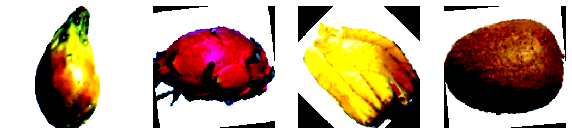

In [13]:
#Display transformed images
#Udacity's helper function from:
# https://github.com/udacity/DL_PyTorch/blob/master/helper.py#L42

def imshow(image, ax=None, title=None, normalize=True):
    """Imshow for Tensor."""
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax


data_iter = iter(dataloaders['train'])

images, labels = next(data_iter)
fig, axes = plt.subplots(figsize=(10,4), ncols=4)

for ii in range(4):
    ax = axes[ii]
    imshow(images[ii], ax=ax, normalize=False)

In [14]:
#use GPU if GPU is available

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
use_gpu = torch.cuda.is_available()

if not use_gpu:
    print('Deferring to CPU... ')
else:
    print('Using GPU for training... ')

Deferring to CPU... 


In [15]:
#Freeze weights in final layer and create new architecture 

model = torchvision.models.resnet18(pretrained=True) 

for param in model.parameters():
    param.requires_grad = False

inputs = model.fc.in_features
output = 106


model.fc = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(inputs, 224)),
                      ('relu1', nn.ReLU()),
                      ('dropout1', nn.Dropout(p=0.1)),
                      ('fc3', nn.Linear(224, output)),
                      ('output', nn.LogSoftmax(dim=1))]))

          
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001) 
criterion = nn.CrossEntropyLoss()
scheduler = lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [16]:
#Train model on 12 epochs, print training loss
#print every 5 batches

epochs = 12

for epoch in range(epochs):  

    running_loss = 0.0
    for i, data in enumerate(dataloaders['train'], 0):
        inputs, labels = data

        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 5 == 4:    
            print('[%d, %5d] Training loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 5))
            running_loss = 0.0


print('Finished Training')

[1,     5] Training loss: 4.776
[1,    10] Training loss: 4.905
[1,    15] Training loss: 4.638
[1,    20] Training loss: 4.680
[1,    25] Training loss: 4.632
[1,    30] Training loss: 4.595
[1,    35] Training loss: 4.554
[1,    40] Training loss: 4.490
[1,    45] Training loss: 4.402
[1,    50] Training loss: 4.455
[1,    55] Training loss: 4.479
[1,    60] Training loss: 4.284
[1,    65] Training loss: 4.357
[1,    70] Training loss: 4.336
[1,    75] Training loss: 4.239
[1,    80] Training loss: 4.368
[1,    85] Training loss: 4.123
[1,    90] Training loss: 4.403
[1,    95] Training loss: 4.242
[1,   100] Training loss: 4.210
[1,   105] Training loss: 4.163
[1,   110] Training loss: 3.887
[1,   115] Training loss: 3.928
[1,   120] Training loss: 3.965
[1,   125] Training loss: 4.123
[1,   130] Training loss: 3.812
[1,   135] Training loss: 3.977
[1,   140] Training loss: 3.890
[1,   145] Training loss: 3.932
[1,   150] Training loss: 3.630
[1,   155] Training loss: 3.650
[1,   16

Actual class of each image:  apple_red_yellow tangelo papaya apple_granny_smith walnut pitahaya_red lychee melon_piel_de_sapo
Predicted class:  cherry_rainier tangelo papaya apple_granny_smith walnut pitahaya_red lychee melon_piel_de_sapo


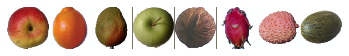

In [17]:
#Print the actual class of 8 different images, and the predicted class from the test set 

dataiter = iter(dataloaders['test'])
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Actual class of each image: ', ' '.join('%5s' % classes[labels[j]] for j in range(8)))

logps = model(images)

_, predicted = torch.max(logps, 1)

print('Predicted class: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(8)))

In [18]:
#Show overall accuracy of test images

correct = 0
total = 0

with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        logps = model(images)
        _, predicted = torch.max(logps.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
      
        
print('Accuracy of the network on the test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the test images: 72 %


In [19]:
#Breakdown of accuracy per image class
# https://stackoverflow.com/questions/41488279/neural-network-always-predicts-the-same-class


class_correct = list(0. for i in range(106))
class_total = list(0. for i in range(106))

with torch.no_grad():
    for data in dataloaders['test']:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(106):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))



Accuracy of apple_braeburn : 67 %
Accuracy of apple_golden_1 : 77 %
Accuracy of apple_golden_2 : 55 %
Accuracy of apple_golden_3 : 63 %
Accuracy of apple_granny_smith : 83 %
Accuracy of apple_red_1 : 24 %
Accuracy of apple_red_2 : 49 %
Accuracy of apple_red_3 : 38 %
Accuracy of apple_red_delicious : 96 %
Accuracy of apple_red_yellow : 75 %
Accuracy of apricot : 64 %
Accuracy of avocado : 93 %
Accuracy of avocado_ripe : 81 %
Accuracy of banana : 77 %
Accuracy of banana_red : 75 %
Accuracy of beans : 75 %
Accuracy of cactus_fruit : 79 %
Accuracy of  cake : 28 %
Accuracy of candy :  4 %
Accuracy of cantaloupe_1 : 84 %
Accuracy of cantaloupe_2 : 74 %
Accuracy of carambula : 90 %
Accuracy of cereal :  4 %
Accuracy of cherry_1 : 96 %
Accuracy of cherry_2 : 50 %
Accuracy of cherry_rainier : 89 %
Accuracy of cherry_wax_black : 83 %
Accuracy of cherry_wax_red : 92 %
Accuracy of cherry_wax_yellow : 96 %
Accuracy of chips : 12 %
Accuracy of chocolate : 18 %
Accuracy of clementine : 52 %
Accuracy 